# Chapter 7: Building an OLS Regression Model

Having built statistics functions, we are now ready to build a function for regression analysis. We will start by building the an regression. We will use linear algebra to estimate parameters that minimize the sum of the squared errors. This is an ordinary least squares regression. 

An OLS regression with one exogenous variable takes the form. 

$y = \alpha + \beta_1x_1 + \mu $

$\beta_0 = \alpha + \mu$

We merge the error term, which represents bias in the data, with alpha to yield the constant, $\beta_0$. This is necessary since OLS assumes an unbiased estimator where:

$\sum_{i=0}^{n-1} e_{i}=0$

Each estimate of a point created from a particular observation takes the form.

$y_i = \beta_0 + \beta_1x_{1,i} + e_i$

This can be generalized to include k exogenous variables:

$y_i = \beta_0 + (\sum_{j=1}^{k} \beta_jx_{i,j}) + e_i$

Ideally, we want to form a prediction where, on average, the right-hand side of the equation  yields the correct value on the left-hand side. When we perform an OLS regression, we form a predictor that minimizes the sum of the distance between each predicted value and the observed value drawn from the data. For example, if the prediction for a particular value of y is 8, and the actual value is 10, the error of the prediction is -2 and the squared error is 4.

To find the function that minimizes the sum squared errors, we will use matrix algebra, also known as linear algebra. For those unfamiliar, the next section uses the numpy library to perform matrix operations. For clarity, we will review the linear algebra functions that we will use with simple examples.

## Linear Algebra for OLS

We solve the following function for a vector of beta values ($\beta$), constants whose values represent estimates of the effect of variables in the set **_X_** on the selected endogenously generate variable $y$. The matrix **_X_** also includes a vector of ones used to estimate the constant $\beta_0$.

$\beta = (X'X)^{-1}X'Y$

$Y =$ Observations for Endogenous Variable

$X =$ Observations for Exogenous Variables

$X' =$ $X$-transpose

$(X'X)^{-1} =$ Inverse of $X'X$

### Inverting a Matrix

In reviewing the linear equation for estimating $\beta$, we confront two unique operations worth understanding. Included in these are some key concepts in linear algebra, including the identity matrix $I$ and linear independence. The best way to understand these concepts is by working with some sample vectors. Consider the matrix $X$ consisting of vectors $x_0$,$x_1$,…,$x_{n-1}$,$x_n$. We must check that these vectors are linearly independent. We do this by joining $X$ with an identity matrix and thus create:

$A = [XI]$

We transform this to show that the product of $A$ and $X^{-1}$ is equal to the product of and an identity matrix, $I$ and $X^{-1}$

$AX^{-1} = [XI]X^{-1}$

$AX^{-1} = [IX^{-1}]$

Let us solve for $AX^{-1}$ using the following vectors for $X$. 

$\begin{equation*}
X = \begin{bmatrix}
1 & 2 & 1 \\
4 & 1 & 5 \\
6 & 8 & 6
\end{bmatrix}
\end{equation*}$

Concatenate a 3 X 3 identity matrix on the left of $X$:

$\begin{equation*}
I = \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
[XI] = \begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
4 & 1 & 5 & 0 & 1 & 0 \\
6 & 8 & 6 & 0 & 0 & 1
\end{bmatrix}
\end{equation*}$

If we perform row operations on $A$ to transform $X$ in $[XI]$ into $I$, then we $I$ will be transformed into $X^{-1}$:

$\begin{equation*}
[XI] = \begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
4 & 1 & 5 & 0 & 1 & 0 \\
6 & 8 & 6 & 0 & 0 & 1
\end{bmatrix}
\end{equation*}$




$\begin{equation*}
r_2 - 4r_1:\begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
0 & -7 & 1 & -4 & 1 & 0 \\
6 & 8 & 6 & 0 & 0 & 1
\end{bmatrix}
\end{equation*}$


$\begin{equation*}
r_3 - 6r_1:\begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
0 & -7 & 1 & -4 & 1 & 0 \\
0 & -4 & 0 & -6 & 0 & 1
\end{bmatrix}
\end{equation*}$


$\begin{equation*}
r_2 \leftrightarrow r_3:\begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
0 & -4 & 0 & -6 & 0 & 1\\
0 & -7 & 1 & -4 & 1 & 0 
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
r_2/{-4}:\begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
0 & 1 & 0 & 3/2 & 0 & -1/4\\
0 & -7 & 1 & -4 & 1 & 0 
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
r_3 + 7r_2:\begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
0 & 1 & 0 & 3/2 & 0 & -1/4\\
0 & 0 & 1 & 13/2 & 1 & -7/4 
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
r_1 + -2r_2 - r_3:\begin{bmatrix}
1 & 0 & 0 & -17/2 & -1 & 9/4 \\
0 & 1 & 0 & 3/2 & 0 & -1/4\\
0 & 0 & 1 & 13/2 & 1 & -7/4 
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
IX^{-1}=\begin{bmatrix}
1 & 0 & 0 & -8.5 & -1 & 2.25 \\
0 & 1 & 0 & 1.5 & 0 & -0.25\\
0 & 0 & 1 & 6.5 & 1 & -1.75 
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
X^{-1}=\begin{bmatrix}
-8.5 & -1 & 2.25 \\
1.5 & 0 & -0.25\\
6.5 & 1 & -1.75 
\end{bmatrix}
\end{equation*}$

By transforming $X$ in matrix $XI$ into an identity matrix, we transform the $I$ matrix into $X^{-1}$. This also confirms that the vectors comprising X are independent, meaning that one vector in the set comprising $X$ cannot be formed from the combination and or transformation of the others. A fundamental assumption of regression analysis is that data generated from factors believed to determine the y-values are independent of one another.

### Linear Algebra in _numpy_

We can check this using linear algebra functions in numpy. We start by creating numpy arrays that we will transform into vectors in the second step. 

In [1]:
#invertMatrix.py
import numpy as np
# create array to be transformed into vectors
x1 = np.array([1,2,1])
x2 = np.array([4,1,5])
x3 = np.array([6,8,6])
print("Array 1:", x1, sep="\n")
print("Array 2:", x2, sep="\n")
print("Array 3:", x3, sep="\n")

Array 1:
[1 2 1]
Array 2:
[4 1 5]
Array 3:
[6 8 6]


Next, transform these arrays into row vectors using _matrix()_.

In [2]:
x1 = np.matrix(x1)
x2 = np.matrix(x2)
x3 = np.matrix(x3)
print("Vector 1", x1, sep="\n")
print("Vector 2", x2, sep="\n")
print("Vector 3", x3, sep="\n")

Vector 1
[[1 2 1]]
Vector 2
[[4 1 5]]
Vector 3
[[6 8 6]]


Join them using the _concatenate()_ function. We define _axis=0_ to stack each row on upon the next:

In [3]:
X = np.concatenate((x1, x2, x3), axis = 0)
print("X:", X, sep="\n")

X:
[[1 2 1]
 [4 1 5]
 [6 8 6]]


Finally, we can invert the matrix that we have made using _.getI()_.

In [4]:
X_inverse = X.getI()
print("X Inverse:", X_inverse, sep = "\n")

X Inverse:
[[-8.50000000e+00 -1.00000000e+00  2.25000000e+00]
 [ 1.50000000e+00  5.12410627e-17 -2.50000000e-01]
 [ 6.50000000e+00  1.00000000e+00 -1.75000000e+00]]


These values are not rounded, so interpretation of the inverted matrix could be more intuitive. We use the _round()_ method from the _numpy_ module to round values to two places.

In [5]:
X_inverse = np.round(X.getI(), 2)
print("X Inverse:", X_inverse, sep = "\n")

X Inverse:
[[-8.5  -1.    2.25]
 [ 1.5   0.   -0.25]
 [ 6.5   1.   -1.75]]


## Building a Regression Function

Now that we have learned the necessary operations, we can create a regression function. Recall that we estimate the vector of beta parameters for each variable with the equation:

$\beta = (X'X)^{-1}X'Y$

In order to estimate the parameters, we will need to import data, define the dependent variable and independent variables, and transform these into matrix objects. We will use one py file to write a regression function and another to write the script that calls the regression function. Let’s start by importing the data that we saved in the previous chapter.

In [6]:
#econFreedomRegression.py
import pandas as pd

data = pd.read_csv("cleanedEconFreedomData.csv", index_col = "Country Name")

After importing the data, we print it to be sure that we have imported correctly. The first part of the results should match the output below.

In the console, enter:

In [7]:
data

,World Rank,Region Rank,2017 Score,Property Rights,Judicial Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,163.0,40.0,48.885716,12.600000,28.400000,27.500000,91.577500,79.877254,97.338404,54.2,...,27.106000,32.0,62.3,1.5,5.4,1947.0,9.6,-1.5,58.0,6.8
Albania,65.0,30.0,64.353003,54.013250,28.473312,39.707367,86.890400,72.499704,51.540942,79.3,...,30.038000,2.8,32.7,2.6,1.9,11300.8,17.3,1.9,1003.3,71.9
Algeria,172.0,14.0,46.528581,38.200000,29.631083,31.700000,81.091100,50.955175,19.847749,62.1,...,44.444000,39.5,578.7,3.7,3.3,14503.9,10.5,4.8,-587.3,8.7
Angola,165.0,41.0,48.515521,36.400000,19.800000,12.800000,87.687500,58.649804,70.743538,58.5,...,28.926000,25.1,184.4,3.0,4.7,7343.8,7.6,10.3,8680.9,62.3
Argentina,156.0,26.0,50.409088,32.449712,39.580063,38.193866,62.611900,54.638703,56.411450,57.3,...,43.947000,42.4,972.0,1.2,2.7,22553.6,6.7,26.5,11654.9,56.5
Armenia,33.0,19.0,70.306017,55.466155,42.549712,43.400000,83.717500,81.697300,82.923269,78.5,...,26.384000,3.3,25.3,3.0,4.3,8467.9,16.3,3.7,180.5,46.6
Australia,5.0,4.0,81.015797,81.713325,92.942177,74.811725,63.187500,58.988439,84.560696,89.3,...,37.249000,23.9,1138.1,2.5,2.7,47389.1,6.3,1.5,22264.5,36.8
Austria,30.0,17.0,72.265759,86.021044,81.783098,75.246672,50.260000,19.293392,79.659892,76.9,...,51.939000,8.6,404.3,0.9,1.0,47249.9,5.7,0.8,3837.4,86.2
Azerbaijan,68.0,15.0,63.599004,50.450592,32.960492,37.600000,87.733600,57.549592,97.392136,71.5,...,38.544000,9.5,169.4,1.1,2.4,17993.4,4.7,4.0,4047.7,36.1


Next we will create the _regression.py_ file. This will contain the regression program that we will call from _econFreedomRegression.py_. For now, import pandas and build the class as demonstrated below.

In [8]:
#regression.py  
# you may ignore import jdc, used to split class development
# other cells that edits a class will include the magic command %% add_to
import jdc
import pandas as pd  
import copy
from stats import *    
  
class Regression:  
    def __init__(self):  
        self.stats = stats()  
          
    def OLS(self, reg_name, data, y_name, beta_names, 
            min_val = 0,  
                max_val = None, constant = True):  
        self.min_val = min_val  
        if max_val != None:  
            self.max_val = max_val  
        else:  
            self.max_val = len(data)  
        self.reg_name = reg_name  
        self.y_name = y_name  
        self.beta_names = copy.copy(beta_names)
        self.data = data.copy()  
        if constant:  
            self.add_constant()  
  
    def add_constant(self):  
        self.data["Constant"] = 1  
        self.beta_names.append("Constant")  

We start by importing pandas, and the stats py file that we have already saved in the same folder. We create two methods inside of the Regression class. First is the *\_\_init\_\_* method. This will create an instance of Stats that will be called later. Second is the regress method. This is our primary method, from which all the necessary steps for preparing data and running a regression will be called. 

The OLS method passes several objects. First is reg_name, which is a string that be included in the regression summary ouput. Data is the pandas data frame used for the regression. Next are the names of the variables we wish to regress: *y_name* is the name of the dependent variable and *x_names* is a list that includes the names of variables that we wish to regress. *min_val* and *max_val* are the starting and ending index values for the regression. 

OLS includes the option to include a constant. If *constant = True*, then a column of ones is added to the data. This column will be used to estimate a constant that determines at what value the fitted line or curve crosses the y-axis. Increase or decrease in this value shift the line up or down, respectively.

In [9]:
#econFreedomRegression
import pandas as pd
from regression import Regression
# . . . 

At the bottom of the code, be sure to create an instance of the Regression class

In [10]:
reg = Regression()

You created an instance of stats()


Now that we have created an instance of the Regression class, we can use the stats

In [11]:
reg

A standard OLS regression assumes that the equation it is estimating will include a constant. We must therefore include a the option to include a constant, or not, in the estimation. To do this, we add a column of ones that will be used to estimate a constant value for our equation. This column of ones is identified by the column name, _“Constant”_.

To see the effect of this addition, we can print the data after we have called the regression function from our object that is an instance of the Regression class. We will choose to print the _“Constant”_ column.

### Selecting Variables

We may ask how different types of freedom toend to affect prosperity within a nation. The Heritage Index of Economic Freedom provides different measures to rate freedom and the rule of law within a country. We use these to predict GDP per capita in each country. Below, is the script that will be used to run a regression. One indicator of the quality of explanatory power provided by an exogenous variable is it’s ability to maintain a steady value in terms of its estimated effect on the endogenous variable as well as its statistical significance. We will return to this discussion once the regression class is completed.

In [12]:
#econFreedomRegression.py
# . . .
y_var = ["GDP per Capita (PPP)"]
x_vars = ["Trade Freedom", "Property Rights", 
          "Inflation (%)",
          "Public Debt (% of GDP)"]

reg.OLS("GDP per Capita", data, y_var, x_vars)

We will run the above script to check our progress as we develop the Regression class. For now, execute the script. In the console, print the data again and you will notice the last columnm, labeled _"Constant"_ , includes a column of ones:

In [13]:
reg.data

,World Rank,Region Rank,2017 Score,Property Rights,Judicial Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,...,"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Constant,GDP per Capita (PPP) estimator
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,163.0,40.0,48.885716,12.600000,28.400000,27.500000,91.577500,79.877254,97.338404,54.2,...,62.3,1.5,5.4,1947.0,9.6,-1.5,58.0,6.8,1,-10820.028616
Albania,65.0,30.0,64.353003,54.013250,28.473312,39.707367,86.890400,72.499704,51.540942,79.3,...,32.7,2.6,1.9,11300.8,17.3,1.9,1003.3,71.9,1,18758.008463
Algeria,172.0,14.0,46.528581,38.200000,29.631083,31.700000,81.091100,50.955175,19.847749,62.1,...,578.7,3.7,3.3,14503.9,10.5,4.8,-587.3,8.7,1,10830.335535
Angola,165.0,41.0,48.515521,36.400000,19.800000,12.800000,87.687500,58.649804,70.743538,58.5,...,184.4,3.0,4.7,7343.8,7.6,10.3,8680.9,62.3,1,5359.858538
Argentina,156.0,26.0,50.409088,32.449712,39.580063,38.193866,62.611900,54.638703,56.411450,57.3,...,972.0,1.2,2.7,22553.6,6.7,26.5,11654.9,56.5,1,6796.620044
Armenia,33.0,19.0,70.306017,55.466155,42.549712,43.400000,83.717500,81.697300,82.923269,78.5,...,25.3,3.0,4.3,8467.9,16.3,3.7,180.5,46.6,1,22130.160337
Australia,5.0,4.0,81.015797,81.713325,92.942177,74.811725,63.187500,58.988439,84.560696,89.3,...,1138.1,2.5,2.7,47389.1,6.3,1.5,22264.5,36.8,1,44041.801962
Austria,30.0,17.0,72.265759,86.021044,81.783098,75.246672,50.260000,19.293392,79.659892,76.9,...,404.3,0.9,1.0,47249.9,5.7,0.8,3837.4,86.2,1,42981.376585
Azerbaijan,68.0,15.0,63.599004,50.450592,32.960492,37.600000,87.733600,57.549592,97.392136,71.5,...,169.4,1.1,2.4,17993.4,4.7,4.0,4047.7,36.1,1,18745.561865


Next we will create the regression.py file. This will contain the regression program that we will call from _econFreedomRegression.py_. For now, import pandas and build the class as demonstrated below.

First, we must estimate the beta vector, $\beta$ and use this to estimate predicted values of y:

$y ̂ = X\beta$
:

In [14]:
%%add_to Regression
#regression.py
import numpy as np
# . . . 
def OLS(self, reg_name, data, y_name, beta_names, min_val = 0,  
            max_val = None, constant = True):  
    self.min_val = min_val  
    if max_val != None:  
        self.max_val = max_val  
    else:  
        self.max_val = len(data)  
    self.reg_name = reg_name  
    self.y_name = y_name  
    self.beta_names = copy.copy(beta_names)
    self.data = data.copy()  
    if constant:  
        self.add_constant()  
    self.build_matrices()
    self.estimate_betas_and_yhat()
    
def build_matrices(self):  
    # Transform dataframes to matrices  
    self.y = np.matrix(self.data[self.y_name][self.min_val:self.max_val])  
    # create a k X n nested list containg vectors for each exogenous var  
    self.X = np.matrix(self.data[self.beta_names])  
    self.X_transpose = np.matrix(self.X).getT()  
    # (X'X)**-1  
    X_transp_X = np.matmul(self.X_transpose, self.X)  
    self.X_transp_X_inv = X_transp_X.getI()  
    # X'y  
    self.X_transp_y = np.matmul(self.X_transpose, self.y)  

def estimate_betas_and_yhat(self):  
    # betas = (X'X)**-1 * X'y  
    self.betas = np.matmul(self.X_transp_X_inv, self.X_transp_y)  
    # y-hat = X * betas  
    self.y_hat = np.matmul(self.X, self.betas)  
    # Create a column that holds y-hat values  
    self.data[self.y_name[0] + " estimator"] = \
        [i.item(0) for i in self.y_hat]  
    # create a table that holds the estimated coefficient  
    # this will also be used to store SEs, t-stats,and p-values  
    self.estimates = pd.DataFrame(self.betas, index = self.beta_names,  
                                  columns = ["Coefficient"])  
    # identify y variable in index  
    self.estimates.index.name = "y = " + self.y_name[0]

From the _econFreedomRegression.py_ file, lets execute the regress function that we have extended. Executing it will generate the data frame of coefficient estimates. In the console enter:

In [15]:
#econFreedomRegression.py
# . . .
reg = Regression()
# . . .
reg.OLS("GDP per Capita", data, y_var, x_vars)

You created an instance of stats()


In [16]:
reg.estimates

,Coefficient
y = GDP per Capita (PPP),
Trade Freedom,60.470390
Property Rights,805.636858
Inflation (%),215.427091
Public Debt (% of GDP),-89.620453
Constant,-24027.120224


We have calculated beta values for each independent variable, meaning that we estimated the average effect of a change in each independent variable upon the dependent variable. While this is useful, we have not yet measured the statistical significance of these estimations; neither have we determined the explanatory power of our particular regression.

Our regression has estimated predicted values for our dependent variable given the values of the independent variables for each observation. Together, these estimations for an array of predicted values that we will refer to as $y ̂ $. We will refer to individual predicted values as ($y_i$) ̂. We will also refer to the mean value of observations of our dependent variable as $y ̅ $ and individual observed values of our dependent variable as $y_i$. These values will be use to estimate the sum of squares due to regression ($SSR$), sum of squared errors ($SSE$), and the total sum of squares ($SST$). By comparing the estimated $y$ values, the observed $y$ values, and the mean of $y$, we will estimate the standard error for each coefficient and other values that estimate convey the significance of the estimation.

We define these values as follows:

$SSR = \sum_{i=0}^{n} (y ̂ _{i} - y ̅ )^2$

$SSE = \sum_{i=0}^{n} (y_{i} - y ̂ _{i})^2$

$SST = \sum_{i=0}^{n} (y_{i} - y ̅ _{i})^2$

It happens that the sum of the squared distances between the estimated values and mean of observed values and the squared distances between the observed and estimated values add up to the sum of the squared distances between the observed values and the mean of observed values. We indicate this as:

$SST = SSR + SSE$

The script below will estimate these statistics. It calls the sum_square_stats method from the which is passed in the calculate_regression_stats method.

In [17]:
%%add_to Regression
#regression.py
# . . . 
def OLS(self, reg_name, data, y_name, beta_names, min_val = 0,  
            max_val = None, constant = True):  
    self.min_val = min_val  
    if max_val != None:  
        self.max_val = max_val  
    else:  
        self.max_val = len(data)  
    self.reg_name = reg_name  
    self.y_name = y_name  
    self.beta_names = copy.copy(beta_names)
    self.data = data.copy()  
    if constant:  
        self.add_constant()  
    self.build_matrices()
    self.estimate_betas_and_yhat()
    self.calculate_regression_stats()

def calculate_regression_stats(self):  
    self.sum_square_stats()  

def sum_square_stats(self):  
    ssr_list = []  
    sse_list = []  
    sst_list = []  
    mean_y = self.stats.mean(self.y).item(0)  
    for i in range(len(self.y)):  
        # ssr is sum of squared distances between the estimated y values  
        # (y-hat) and the average of y values (y-bar)  
        yhat_i = self.y_hat[i]  
        y_i = self.y[i]  
        r = yhat_i - mean_y  
        e = y_i - yhat_i  
        t = y_i - mean_y  
        ssr_list.append((r) ** 2)  
        sse_list.append((e) ** 2)  
        sst_list.append((t) ** 2)  

    # call item - call value instead of matrix  
    self.ssr = self.stats.total(ssr_list).item(0)  
    self.sse = self.stats.total(sse_list).item(0)  
    self.sst = self.stats.total(sst_list).item(0)  


In [18]:
#econFreedomRegression.py
# . . .
reg = Regression()
# . . .
reg.OLS("GDP per Capita", data, y_var, x_vars)

You created an instance of stats()


The elements of the lists created are actually matrices, so we select the element in the matrix by calling _.item(0)_ after summing each list with _total()_.

Now, the regression method will allow us to call the *SSR*, *SSE*, and *SST* values. These will be used to calculate the measures commonly associated with a regression such as r-squared and estimator variance. In the console enter:


In [19]:
print(reg.ssr, reg.sse, reg.sst)

40627979241.38489 39504107666.81548 80132086908.20023


With the sum of squared errors calculated, the next step is to calculate the estimator variance and use this to construct the covariance matrix. The covariance matrix is used to derive the standard errors and related statistics for each estimated coefficient.

We estimate the variance of the error term of the estimator for the dependent variable. 

$\sigma^2 = \frac{SSE}{n-k}$

$n = $number of observations

$k = $number of independent variables

An increase in the number of exogenous variables tends ot increase the fit of a model. By dividing the $SSE$ by degrees of freedom, $n-k$ , improvements in fit that result from increases in the number of variables are offset in part by a reduction in degrees of freedom. 

Finally, we calculate the covariance matrix:

$\sigma^2 (X'X)^{-1}$


In [20]:
%%add_to Regression
#regression.py
# . . . 
def calculate_regression_stats(self):
    self.sum_square_stats()
    self.calculate_degrees_of_freedom()
    self.calculate_estimator_variance()
    self.calculate_covariance_matrix()

def calculate_degrees_of_freedom(self):  
    # Degrees of freedom compares the number of observations to the number  
    # of exogenous variables used to form the prediction  
    self.lost_degrees_of_freedom = len(self.estimates)  
    self.num_obs = self.max_val + 1 - self.min_val  
    self.degrees_of_freedom = self.num_obs - self.lost_degrees_of_freedom  
         
def calculate_estimator_variance(self):  
    # estimator variance is the sse normalized by the degrees of freedom  
    # thus, estimator variance increases as the number of exogenous  
    # variables used in estimation increases(i.e., as degrees of freedom   
    # fall)  
    self.estimator_variance = self.sse / self.degrees_of_freedom  

def calculate_covariance_matrix(self):  
    # Covariance matrix will be used to estimate standard errors for  
    # each coefficient.  
    # estimator variance * (X'X)**-1  
    self.cov_matrix = float(self.estimator_variance) * self.X_transp_X_inv  
    self.cov_matrix = pd.DataFrame(self.cov_matrix,  
                                   columns = self.beta_names,  
                                   index = self.beta_names)

In [21]:
reg = Regression()
reg.OLS("GDP per Capita", data, y_var, x_vars)

You created an instance of stats()


In the final method, calculate_covariance_matrix, the estiamtor variance is used to calculate the estimator covariance matrix. We will view this table by creating a csv. Enter the following command into the console:

In [22]:
reg.cov_matrix.to_csv("regCovMatrix.csv")
reg.cov_matrix

,Trade Freedom,Property Rights,Inflation (%),Public Debt (% of GDP),Constant
Trade Freedom,2.493045e+04,-9428.587294,-7.911424,746.819189,-1.441626e+06
Property Rights,-9.428587e+03,7691.569780,2454.380917,-710.288113,3.368646e+05
Inflation (%),-7.911424e+00,2454.380917,13712.250604,-100.255941,-1.836721e+05
Public Debt (% of GDP),7.468192e+02,-710.288113,-100.255941,1312.137019,-8.981082e+04
Constant,-1.441626e+06,336864.584639,-183672.106930,-89810.818777,9.921064e+07


The diagonals of the covariance matrix represent the squared standard errors for each exogenous variable. The standard what we will use to calculate t-statistics and p-values. The t-statisitic of a coefficient is found by comparing the size of the estimated coefficient to its standard error:

$tstat_{\beta_i}=\frac{\beta_i}{SE_{\beta_i}}$

The larger the coefficient compared to the error, the more reliable is the statistic, as implied by a large t-stat. We draw the p-value associated with a particular t-stat from a table in light of the degrees of freedom associated with the regression. The p-values provides a rating of the estimate in light of the t-stat together with the number of degrees of freedom.

In [23]:
#regression.py
from scipy.stats import t, f
# . . . 

In [24]:
%%add_to Regression
# . . . 
def calculate_regression_stats(self):
    self.sum_square_stats()
    self.calculate_degrees_of_freedom()
    self.calculate_estimator_variance()
    self.calculate_covariance_matrix()
    self.calculate_t_p_error_stats()
    
def calculate_t_p_error_stats(self):
    ratings = [.05, .01, .001]  
    results = self.estimates  
    stat_sig_names = ["SE", "t-stat", "p-value"]  
    # create space in data frame for SE, t, and p  
    for stat_name in stat_sig_names:  
        results[stat_name] = np.nan  
    # generate statistic for each variable  
    for var in self.beta_names:  
        # SE ** 2 of coefficient is found in the diagonal of cov_matrix  
        results.loc[var]["SE"] = self.cov_matrix[var][var] ** (1/2)  

        # t-stat = Coef / SE  
        results.loc[var]["t-stat"] = \
            results["Coefficient"][var] / results["SE"][var]  
        # p-values is estimated using a table that transforms t-value in   
        # light of degrees of freedom  
        results.loc[var]["p-value"] = np.round(t.sf(np.abs(results.\
                   loc[var]["t-stat"]), self.degrees_of_freedom + 1) * 2, 5)  
    # values for significances will be blank unless p-values < .05  
    # pandas does not allow np.nan values or default blank strings to   
    # be replaced   
    significance = ["" for i in range(len(self.beta_names))]  
    for i in range(len(self.beta_names)):  
        var = self.beta_names[i]  
        for val in ratings:  
            if results.loc[var]["p-value"] < val:  
                significance[i] = significance[i]  + "*"  
    results["signficance"] = significance

In [25]:
reg = Regression()
reg.OLS("GDP per Capita", data, y_var, x_vars)

You created an instance of stats()


 The standard errors, t-statistics and p-values are saved in the same dataframe as the coefficient estimates. Call them with the command:

In [26]:
reg.estimates.to_csv("estimates.csv")
reg.estimates

,Coefficient,SE,t-stat,p-value,signficance
y = GDP per Capita (PPP),,,,,
Trade Freedom,60.470390,157.893803,0.382981,0.70221,
Property Rights,805.636858,87.701595,9.186114,0.00000,***
Inflation (%),215.427091,117.099319,1.839696,0.06757,
Public Debt (% of GDP),-89.620453,36.223432,-2.474102,0.01434,*
Constant,-24027.120224,9960.453748,-2.412252,0.01692,*


Next we will use the statistics that we have calculated to build the mean squared error (MSE), the square root of the mean squared error, R2, and F-stat. 

The variance term will be used to help us calculate other values. First we estimate the square root of the mean squared error. Since the mean squared error is the variance of the estimator, this means we simply take the square root the variance term

$rootMSE = \sqrt{\sigma^2}$

The square-root of the MSE provides a more readily interpretable estimate of the estimator variance, showing the average distance of predicted values from actual values, corrected for the number of independent variables. 

We also estimate the R2 value. This value indicates the explanator power of the regression

$R^2 = \frac{SSR}{SST}$

This compares the average squared distance between the predicted values and the average value against the average squared distance between observed values and average values. Ordinary least squares regression minimizes the squared distance between the predicted value and the average value. If values are perfectly predicted, then the SSR would equal the SST. Usually, the SSR is less than the SST. It will never be greater than the SST.

Finally we calculate the F-statistic, commonly referred to as the F-stat:

$ F =\frac{\frac{SST - SSE}{K - 1}}{\frac{SSE}{N - K}}$

The F-statistic tests the likelihood of whether or not the values of our estimated parameters are all zero:

$\beta_1 = \beta_2 = . . . = \beta_{n-1} = \beta_n$ 

We check the difference between the SST and SSE divided by the number of independent variables used in the regression less one. We divide this value by the mean squared error. 

In [27]:
%%add_to Regression
#regression.py
# . . . 
def calculate_regression_stats(self):  
    self.sum_square_stats()  
    self.calculate_degrees_of_freedom()  
    self.calculate_estimator_variance()  
    self.calculate_covariance_matrix()  
    self.calculate_t_p_error_stats()  
    self.calculate_root_MSE()  
    self.calculate_rsquared()  
    self.calculate_fstat()  
    self.build_stats_DF()
#. . . 
def calculate_root_MSE(self):  
    self.root_mse = self.estimator_variance ** (1/2)  

def calculate_rsquared(self):  
    self.r_sq = self.ssr / self.sst  

def calculate_fstat(self):  
    self.f_stat = (self.sst - self.sse) / (self.lost_degrees_of_freedom\
                  - 1) / self.estimator_variance  
def build_stats_DF(self):  
    stats_dict = {"r**2":[self.r_sq],  
                 "f-stat":[self.f_stat],   
                 "Est Var":[self.estimator_variance],  
                 "rootMSE":[self.root_mse],  
                 "SSE":[self.sse],  
                 "SSR":[self.ssr],   
                 "SST":[self.sst],  
                 "Obs.":[int(self.num_obs)],   
                 "DOF":[int(self.degrees_of_freedom)]}  
    self.stats_DF = pd.DataFrame(stats_dict)
    self.stats_DF = self.stats_DF.rename(index={0:"Estimation Statistics"})
    self.stats_DF = self.stats_DF.T    

In [28]:
reg = Regression()
reg.OLS("GDP per Capita", data, y_var, x_vars)

You created an instance of stats()


Be sure to call the function at the end of the *calculate_regression_stats()* method. Then, save *stats_DF* as a csv with the command: 

In [29]:
reg.stats_DF.to_csv("reg_stats.csv")
reg.stats_DF

,Estimation Statistics
r**2,5.070126e-01
f-stat,4.319488e+01
Est Var,2.351435e+08
rootMSE,1.533439e+04
SSE,3.950411e+10
SSR,4.062798e+10
SST,8.013209e+10
Obs.,1.730000e+02
DOF,1.680000e+02


You have successfully created a program that runs completes OLS regression and organizes statistics from this regression!

## Tests and Adjustments

In addition to the essential elements that you have included in the regression method, some other evaluative critieria is in order. We will include calculate the adjusted r-squared as well as joint f-tests. The first of these is used to offset the increase in the r-squared value that otherwise occurs when exogenous variables are added to a regression. It is possible that the addition of irrevelevant variables appear to increase goodness-of-fit.

For similar purposes, we will include the joint F-test. This compares the explanatory power of two regressions, revealing whether or not the inclusion of additional variables is actually improving explanatory power of the regression. 

### Adjusted R-Squared
Although the R2 is a useful measure to understand the quality of the explanation provided by the  selected exogenous variables. Recall that:

$R^2 = \frac{SSR}{SST}$

$R^2 = 1 - \frac{\frac{SSE}{n - k}}{\frac{SST}{n-1}}$

Notice that as the degrees of freedom decrease, the numerator necessarily decreases as well. Although it is not always appropriate to use the adjusted $R^2$, it is often useful to help gauge whether or not a marginal addition of a variable improves explanatory power of a regression.

In [30]:
%%add_to Regression
#regression.py
# . . . 
def calculate_rsquared(self):  
    self.r_sq = self.ssr / self.sst
    self.adj_r_sq = 1 - self.sse / self.degrees_of_freedom / (self.sst\
        / (self.num_obs - 1))  

def build_stats_DF(self):  
    stats_dict = {"r**2":[self.r_sq],  
                 "Adj. r**2":[self.adj_r_sq],
                 "f-stat":[self.f_stat],   
                 "Est Var":[self.estimator_variance],  
                 "rootMSE":[self.root_mse],  
                 "SSE":[self.sse],  
                 "SSR":[self.ssr],   
                 "SST":[self.sst],  
                 "Obs.":[int(self.num_obs)],   
                 "DOF":[int(self.degrees_of_freedom)]}  
    self.stats_DF = pd.DataFrame(stats_dict)
    self.stats_DF = self.stats_DF.rename(index={0:"Estimation Statistics"})
    self.stats_DF = self.stats_DF.T

In [31]:
reg = Regression()
reg.OLS("GDP per Capita", data, y_var, x_vars)

You created an instance of stats()


Now *stats_DF* includes the adjusted $R^2$:

In [32]:
reg.stats_DF

,Estimation Statistics
r**2,5.070126e-01
Adj. r**2,4.952748e-01
f-stat,4.319488e+01
Est Var,2.351435e+08
rootMSE,1.533439e+04
SSE,3.950411e+10
SSR,4.062798e+10
SST,8.013209e+10
Obs.,1.730000e+02
DOF,1.680000e+02


### Joint F-test

Just as the adjusted r-squared allows for a more effective comparison of regressions that have varying numbers of variables, so too does the joint f-test. In order to compare regressions, we must save results from at least two compareable regression. To save results, we create a dictionary name *reg_history* and save this using the method, *save_output*.

In [33]:
%%add_to Regression
#regression.py  
# . . . 
def __init__(self):  
    self.stats = stats()  
    self.reg_history = {}  

def OLS(self, reg_name, data, y_name, beta_names, min_val = 0,  
            max_val = None, constant = True):  
    self.min_val = min_val  
    if max_val != None:  
        self.max_val = max_val  
    else:  
        self.max_val = len(data)  
    self.reg_name = reg_name  
    self.y_name = y_name  
    self.beta_names = copy.copy(beta_names)
    self.data = data.copy()  
    if constant:  
        self.add_constant()  
    self.build_matrices()
    self.estimate_betas_and_yhat()
    self.calculate_regression_stats()
    self.save_output()
    
def save_output(self):  
    self.reg_history[self.reg_name] = {"Reg Stats": self.stats_DF.copy(),  
                                    "Estimates": self.estimates.copy(),  
                                    "Cov Matrix":self.cov_matrix.copy(),
                                    "Data":self.data.copy()}

By saving the regression statistics, estimates, and covariance matrix in a dictionary with a unique key that is the string passed as *self.reg_name* for the regression, results from multiple regression can be called. This is required for running a *joint_f_test()*, which is supposed to estimate whether or not the addition of an exogenous variable in a regression actually improves the explantory power of the regression.

The joint f-test compares a restricted and unrestricted regression. The unrestricted regression uses the same exogenous variables as the restricted regression, and adds at least one more exogenous variable to be used to estimate values of y. The joint f-test checks whether, the betas values of the exogenous variables included in the unretricted regression are different than zero.

To check, we calculate the joint F-statistic:

$ F = \frac{\frac{SSE_r - SSE_u}{k_r - k_u}}{\frac{SSE_u}{n - k_u}}$

If the p-values associated with this f-statistic indicates statistical significance, then at least one of the additional variables improve the explanatory power of the regression.

In [34]:
%%add_to Regression
def joint_f_test(self, reg1_name, reg2_name):  
    # identify data for each regression  
    reg1 = self.reg_history[reg1_name]  
    reg2 = self.reg_history[reg2_name]  
    # identify beta estimates for each regression to draw variables  
    reg1_estimates = reg1["Estimates"]          
    reg2_estimates = reg2["Estimates"]  
    # name of y_var is saved as estimates index name  
    reg1_y_name = reg1_estimates.index.name  
    reg2_y_name = reg2_estimates.index.name  
    num_obs1 = reg1["Reg Stats"].loc["Obs."][0]  
    num_obs2 = reg2["Reg Stats"].loc["Obs."][0]  
    # check that the f-stat is measuring restriction, not for diff data sets
    if num_obs1 != num_obs2:   
        self.joint_f_error()  
    if reg1_y_name == reg2_y_name:          
        restr_reg = reg1 if \
            len(reg1_estimates.index) < len(reg2_estimates.index) else reg2 
        unrestr_reg = reg2 if restr_reg is reg1 else reg1  
        restr_var_names = restr_reg["Estimates"].index  
        unrestr_var_names = unrestr_reg["Estimates"].index  
    # identify statistics for each regression  
    restr_reg = restr_reg if False not in \
            [key in unrestr_var_names for key in restr_var_names] else None
    if restr_reg == None:  
        self.joint_f_error()  
    else:  
        sser = restr_reg["Reg Stats"].loc["SSE"][0]  
        sseu = unrestr_reg["Reg Stats"].loc["SSE"][0]  
        dofr = restr_reg["Reg Stats"].loc["DOF"][0]       
        dofu = unrestr_reg["Reg Stats"].loc["DOF"][0]  
        dfn = dofr - dofu  
        dfd = dofu - 1  
        f_stat = ((sser - sseu) / (dfn)) / (sseu / (dfd))  
        f_crit_val = 1 - f.cdf(f_stat,dfn = dfn, dfd = dfd)  
        #make dictionary?  
        f_test_label = "h_0:"  
        for key in unrestr_var_names:  
            if key not in restr_var_names:  
                 f_test_label = f_test_label + str(key) + " == "  
        f_test_label = f_test_label + "0"  
        res_dict = {"f-stat":[f_stat],  
                    "p-value":[f_crit_val],  
                    "dfn":[dfn],  
                    "dfd":[dfd]}  
        res_DF = pd.DataFrame(res_dict)  
        res_DF = res_DF.rename(index={0:""})  
        res_DF = res_DF.T  
        res_DF.index.name = f_test_label  

        return res_DF  

def joint_f_error(self):  
        print("Regressions not comparable for joint F-test")  
        return None  

### Call the Joint F-Test

Having constructed a method to run the joint F-test, we first need to define the restricted and unrestricted regressoin. The restricted regression will have only two variables: *“Property Rights”* and *"Public Debt (% of GDP)"*. These two variables are the only exogenous variables from the earlier regression that were significant. We will compare the regression that we ran, the unrestricted regression, with this restricted regression. Name each regression accordingly, then call the *joint_f_test()* using the names for each regression. The program is distinguish automoticallly which is restricted and which is unrestricted. Since the results of the test are saved in a dataframe, we can save the results as a csv.

In [35]:
#EconFreedomRegression.py
# . . . 
reg = Regression()  

You created an instance of stats()


In [36]:
y_var = ["GDP per Capita (PPP)"]  
x_vars_unrestricted = ["Trade Freedom", "Property Rights", "Inflation (%)",
          "Public Debt (% of GDP)"]  
x_vars_restricted = ["Trade Freedom", "Property Rights", "Inflation (%)"]  
reg.OLS("GDP Per Capita Unrestricted", data, y_var, x_vars_unrestricted)  
reg.OLS("GDP Per Capita Restricted", data, y_var, x_vars_restricted)  
  
joint_f_test = reg.joint_f_test("GDP Per Capita Unrestricted",   
                                "GDP Per Capita Restricted")  
joint_f_test.to_csv("Joint F_test; y = " + reg.y_name[0] + "; " +\
                    joint_f_test.index.name + ".csv")
joint_f_test

,
h_0:Public Debt (% of GDP) == 0,
f-stat,6.084743
p-value,0.014645
dfn,1.000000
dfd,167.000000


The test indicates that the null-hypothesis, that the variable *"Public Debt (% of GDP)"* exhibits a consistent effect different than zero, holds since the p-value generated by the test is less than 0.05. 

## Visualizing Regression Results

To get the most value out of a regression function requires not only tables for statistics. Visualizations that compare observations to estimates form the regression are a powerful means of presenting results. Since we have already generated estimations for y_hat, this simply requires the plotting of y values against values of exogenous variables. On the same plot, do the same for estimator (*yhat*) values.

In the next section we will use a for loop to compare the predicted values of the y variable with observed values in a scatter plot. Each plot will include the y-values on the veritcal axis and the values of an exogenous variable on the y axis. 

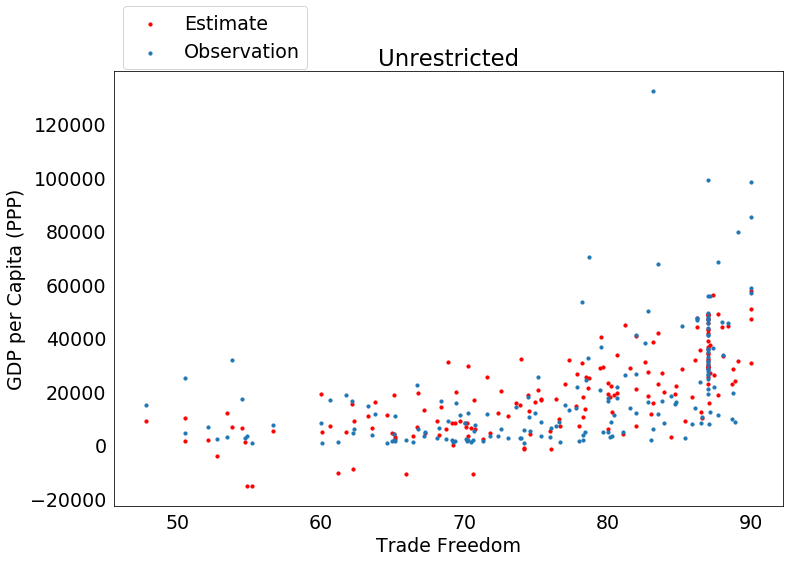

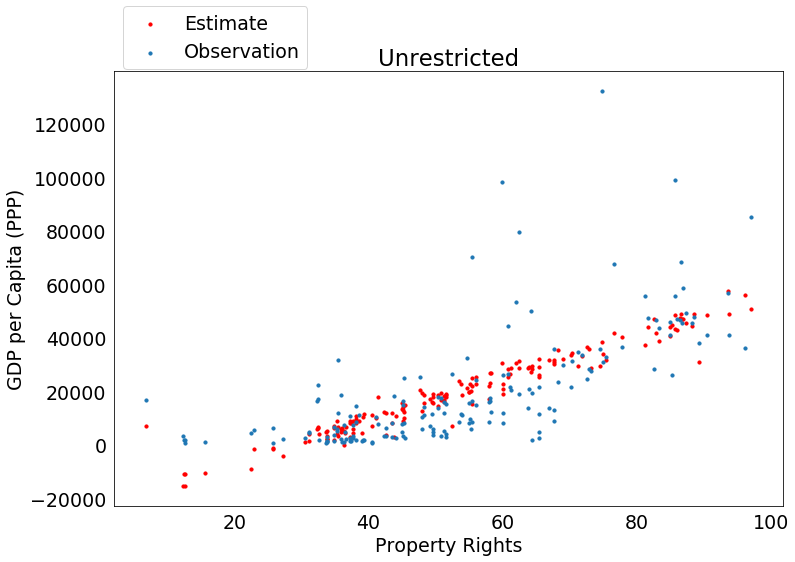

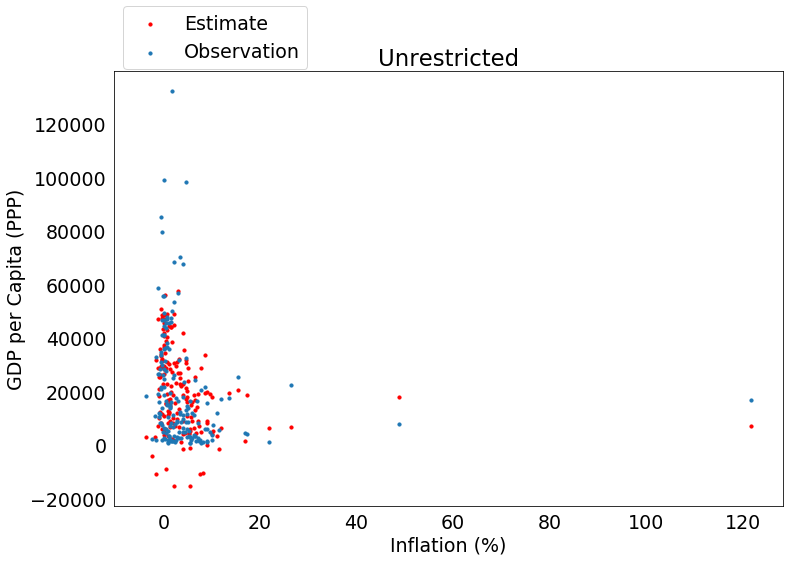

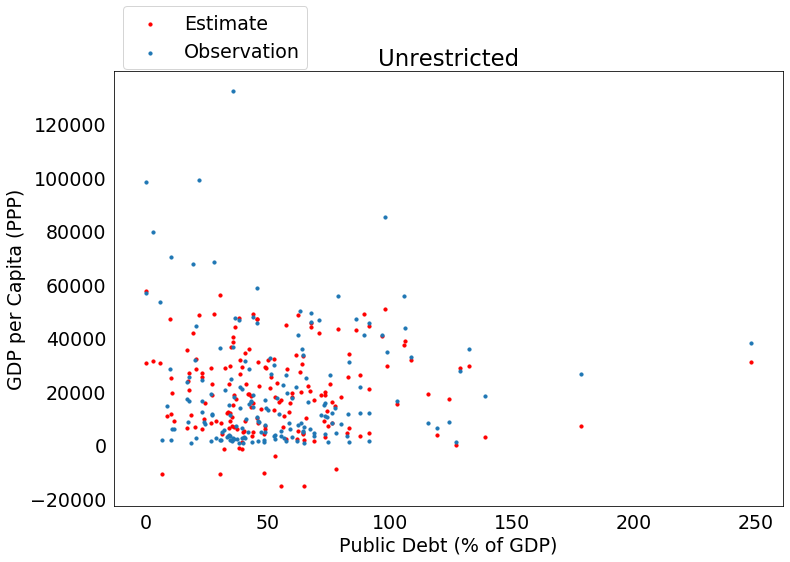

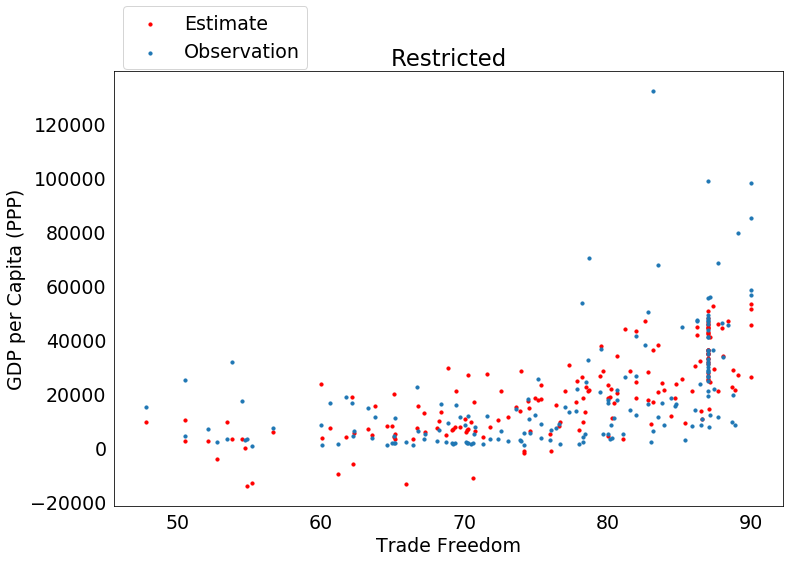

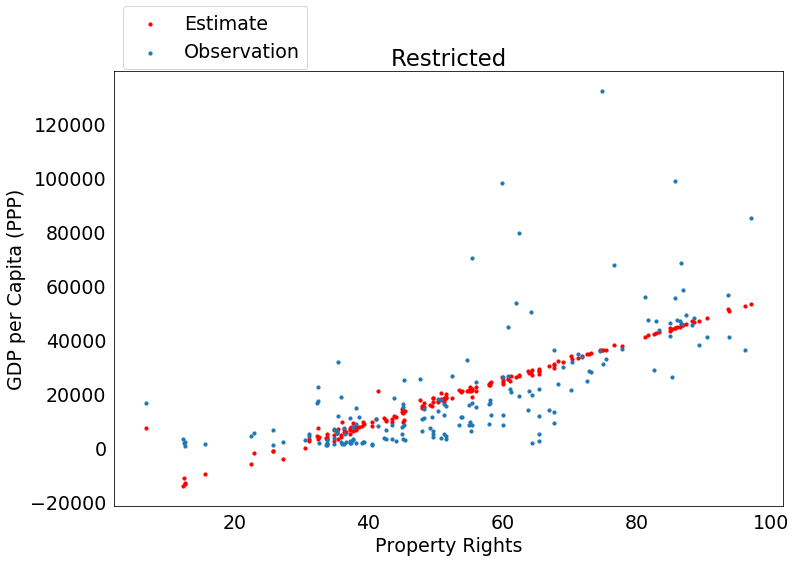

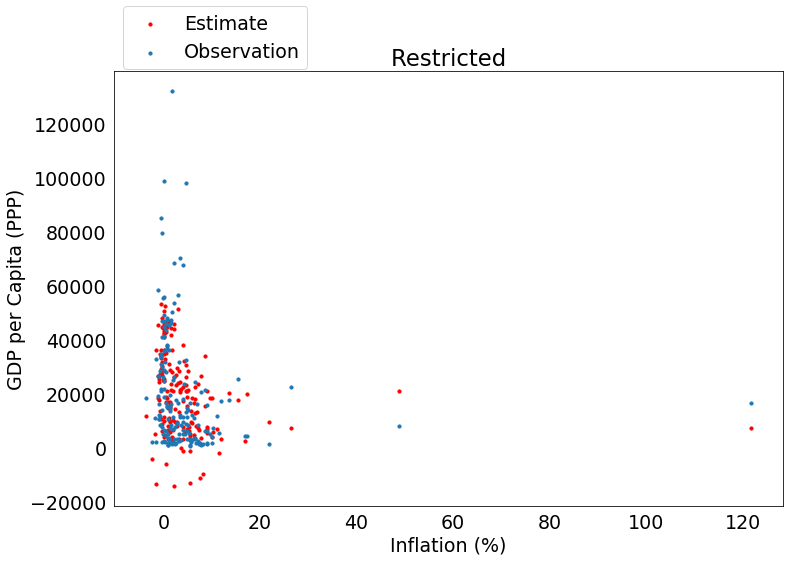

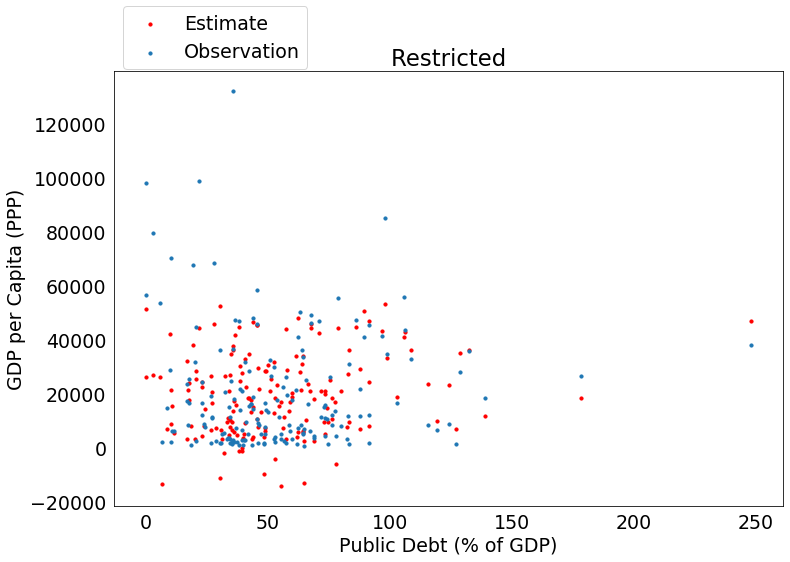

In [37]:
#econFreedomRegression.py
# . . . 
import matplotlib.pyplot as plt

def plot_scatter_with_estimator(title, data, x_vars, y_var):  
    # set default font size  
    plt.rcParams.update({"font.size": 19})  
    # use a for loop to call each exogenous variable  
    y = y_var[0]  
    for x in x_vars:  
        # prepare a figure with the predictor. We will use ax to specify that  
        # the plots are in the same figure  
        fig, ax = plt.subplots(figsize = (12, 8))  
        # labels will be in a legend  
        y_label1 = "Estimate"  
        y_label2 = "Observation"  
        # plot the estimated value  
        data.plot.scatter(x = x, y = y + " estimator", ax = ax, c = "r",  
                          s = 10, label = y_label1, legend = False)  
        # erase the y-axis label so that "estimator" is not present  
        # the y-label will reappear when the observations are plotted  
        plt.ylabel("")  
        data.plot.scatter(x = x, y = y, ax = ax, s = 10, label = y_label2,  
                          legend = False)  
        # call the legend, place atop the image on the left  
        # bbox_to_anchor used to specify exact placement of label  
        plt.legend(loc = "upper left", labels = [y_label1, y_label2],   
                   bbox_to_anchor = (0, 1.17))  
        plt.title(title)
        # remove lines marking units on the axis  
        ax.xaxis.set_ticks_position('none')  
        ax.yaxis.set_ticks_position('none')  
        plt.show()  
        plt.close()  
# . . . 
y_var = ["GDP per Capita (PPP)"]  
x_vars_unrestricted = ["Trade Freedom", "Property Rights", "Inflation (%)",
          "Public Debt (% of GDP)"]  
x_vars_restricted = ["Trade Freedom", "Property Rights", "Inflation (%)"]  
reg.OLS("GDP Per Capita Unrestricted", data, y_var, x_vars_unrestricted)
reg.OLS("GDP Per Capita Restricted", data, y_var, x_vars_restricted)  
reg_name = "GDP Per Capita Unrestricted"
plot_scatter_with_estimator("Unrestricted", reg.reg_history[reg_name]\
                            ["Data"], x_vars, y_var)
reg_name = "GDP Per Capita Restricted"
plot_scatter_with_estimator("Restricted", reg.reg_history[reg_name]\
                            ["Data"], x_vars, y_var)

The visualization generated by this script allow for a comparison of estimates of y-variable generated from a set of observed values to the actual values that were part of the observations.

### Exercise:

1.	Run an OLS regression using a different set of data. Use the regression class created in this chapter. Print the results.
2.	Create scatter plots of the observation and predicted values as demonstrated at the end of this chapter.
3.	Use the numpy libraries log function to log some or all value in your data. Print the columns of data that have been logged. (hint: pass the appropriate list of keys to the dataframe, data[[key1,key2,key3…]])
4.	Run the same regression again. Print the results. How has the significance changed?
5.	Plot the new results using scatter plots as in question 2.
6.	Create 2 unique visualizations of the results using matplotlib (e.g., time series predicted values and observations, plots with more than 2 variables represented such as 3D plane or changing size of dots, a plot comparing results of the logged and unlogged regression, etc…). For visualization ideas visit the [matplotlib website](https://matplotlib.org/examples/).
